In [1]:
from keras.datasets import mnist
from keras import models
from keras import layers

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
type(train_images)

numpy.ndarray

In [5]:
train_images.dtype

dtype('uint8')

In [6]:
train_images.ndim

3

In [7]:
train_images.shape

(60000, 28, 28)

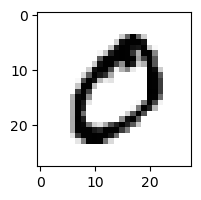

In [8]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [2.00, 2]
plt.imshow(train_images[1,:,:], cmap=plt.cm.binary, aspect=1 )
plt.show()

In [9]:
type(train_labels)

numpy.ndarray

In [10]:
train_labels.shape

(60000,)

In [11]:
train_labels[1]

0

In [12]:
type(test_images)

numpy.ndarray

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
test_labels.shape

(10000,)

In [15]:
#Reshaping the images into 1d instead 2
train_images = train_images.reshape((60000,28*28))
#scaling the images into 0-1 interval
train_images = train_images.astype("float32")/255

In [16]:
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype("float32")/255

In [17]:
train_images.shape


(60000, 784)

In [18]:
test_images.shape

(10000, 784)

In [19]:
#Encoding categorically
from keras.utils import to_categorical
train_labels  = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [20]:
model = models.Sequential()

In [21]:
#2dense layers
model.add(layers.Dense(512,activation="relu", input_shape=(28*28,)))
#since multiclass and we need probability we will be using softmax in output layer
model.add(layers.Dense(10,activation="softmax"))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])


In [24]:
model.fit(train_images,train_labels,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 3ms/step - loss: 0.2616 - accuracy: 0.9252
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1073 - accuracy: 0.9682
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0709 - accuracy: 0.9788
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0514 - accuracy: 0.9838
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0385 - accuracy: 0.9888


In [25]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print("test_loss: ",test_loss,"\ntest_acc: ",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0634 - accuracy: 0.9806
test_loss:  0.0634109228849411 
test_acc:  0.9805999994277954


In [26]:
y_predict = model.predict(test_images)
y_predict[0]

313/313 [==============================] - 1s 1ms/step


array([2.1515081e-08, 9.3779640e-10, 3.4208806e-06, 4.2481893e-06,
       2.1435002e-12, 1.0040125e-07, 4.2969960e-13, 9.9999118e-01,
       4.2615834e-08, 9.2061134e-07], dtype=float32)

In [27]:
import numpy as np
np.argmax(y_predict[0])

7

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 40.5 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.7/302.7 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 65.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of fastapi to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 8.1 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.1-py3-none-any.whl size=5596 sha256=2

import gradio as gr

def predict(image):
    image = image.reshape(-1,28*28)
    prediction = model.predict(image)
    return np.argmax(prediction)
gr.Interface(fn=predict, inputs="sketchpad",outputs="text").launch(debug=True)

In [ ]:
import gradio as gr

def predict(image):
    image = image.reshape(-1,28*28)
    prediction = model.predict(image)
    return np.argmax(prediction)
gr.Interface(fn=predict, inputs="sketchpad",outputs="text").launch(debug=True)